In [6]:
# import csv
import os
import numpy as np
import pandas as pd
dataset = 'PTC_MR'
x0 = 100
x1 = 1300
y0 = 0.55
y1 = 0.75

In [7]:
method_list = ['HKS','WKS']
Path_list = ["./results/"+dataset+"/"+method+"/" for method in method_list]
x_axis = [100,200,300,400,500,600,700,800,900,1000,1100,1200,1300]


# Get list of all files in a given directory sorted by name
list_of_files = [sorted( filter( lambda x: os.path.isfile(os.path.join(Path, x)),
                        os.listdir(Path) ) ) for Path in Path_list]
results_list = []
results_list.append([pd.read_csv(Path_list[0]+i) for i in list_of_files[0] ])
results_list.append([pd.read_csv(Path_list[1]+i) for i in list_of_files[1] ])

In [8]:
results_list[0][0]

,Unnamed: 0,w,C,gamma,accuracy
0,fold_id0,0.35,1000.0,1.0,0.514286
1,fold_id1,0.35,1000.0,1.0,0.628571
2,fold_id2,0.35,1000.0,1.0,0.428571
3,fold_id3,0.35,1000.0,1.0,0.600000
4,fold_id4,0.35,1000.0,1.0,0.588235
5,fold_id5,0.35,1000.0,1.0,0.588235
6,fold_id6,0.35,1000.0,1.0,0.617647
7,fold_id7,0.35,1000.0,1.0,0.500000
8,fold_id8,0.35,1000.0,1.0,0.558824
9,fold_id9,0.35,1000.0,1.0,0.617647


In [9]:
hks_means = np.array([np.mean(file["accuracy"]) for file in results_list[0]])
hks_stes = np.array([np.std(file["accuracy"]) for file in results_list[0]])/np.sqrt(10)
wks_means = np.array([np.mean(file["accuracy"]) for file in results_list[1]])
wks_stes = np.array([np.std(file["accuracy"]) for file in results_list[1]])/np.sqrt(10)

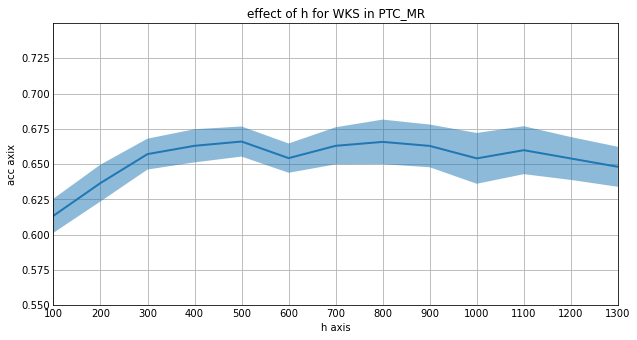

In [12]:
import matplotlib.pyplot as plt
plt.style.use('_mpl-gallery')
# plot
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

plt.title("effect of h for WKS in PTC_MR") 
plt.xlabel("h axis") 
plt.ylabel("acc axix") 

# ax.fill_between(x_axis, hks_means-hks_stes, hks_means+hks_stes, alpha=.5, linewidth=0)
ax.fill_between(x_axis, wks_means-wks_stes, wks_means+wks_stes, alpha=.5, linewidth=0)

# ax.plot(x_axis, hks_means, linewidth=2)
ax.plot(x_axis, wks_means, linewidth=2)
ax.set(xlim=(x0, x1), xticks=np.arange(x0, x1+100, 100),
       ylim=(y0, y1), yticks=np.arange(y0, y1, 0.025))
plt.show()
# plt.savefig('effect of h for WKS in '+dataset+'.png', bbox_inches='tight', pad_inches=0)

In [13]:
data = np.array([8.13,	6.47,	5.77,	4.33,	3.75, 6.01,	4.25,	3.38,	3.70,	3.89]
)

In [15]:
np.around(data/np.sqrt(10),2)

array([2.57, 2.05, 1.82, 1.37, 1.19, 1.9 , 1.34, 1.07, 1.17, 1.23])

In [18]:
data = [5.6,
4.5,
5.7,
6]

data = np.around(np.array(data)/np.sqrt(10),2)
for i in data:
    print(i)

5.6
4.5
5.7
6.0
